##### Details:

https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#


#### Feature details:

holiday Categorical US National holidays plus regional holiday, Minnesota State Fair

temp Numeric Average temp in kelvin

rain_1h Numeric Amount in mm of rain that occurred in the hour

snow_1h Numeric Amount in mm of snow that occurred in the hour

clouds_all Numeric Percentage of cloud cover

weather_main Categorical Short textual description of the current weather

weather_description Categorical Longer textual description of the current weather

date_time DateTime Hour of the data collected in local CST time

traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
traffic_df= pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [ ]:
traffic_df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [ ]:
### no data is missing, we can proceed further

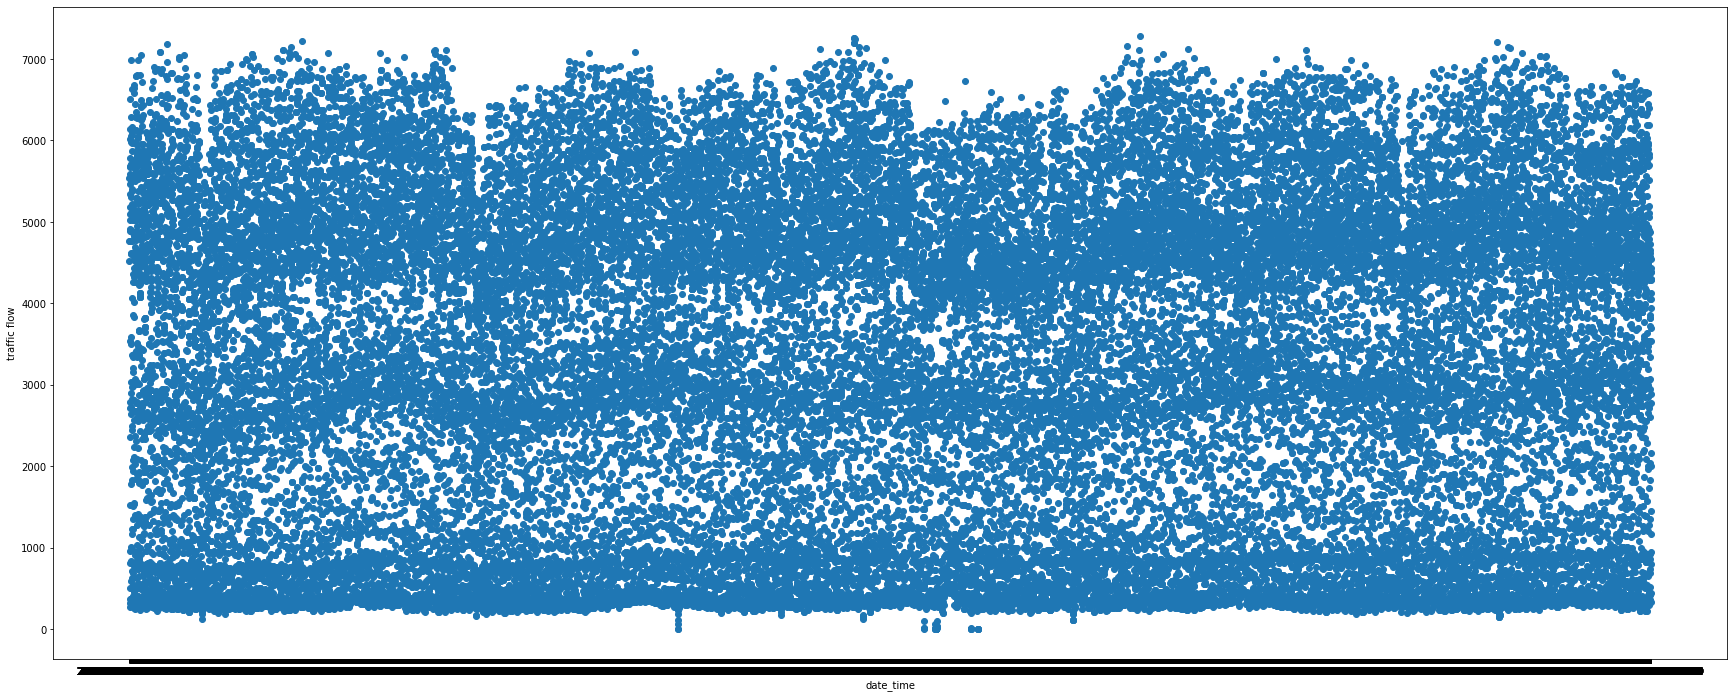

In [ ]:
#### Drawing a time series analysis of traffic flow with respect to date feature
plt.figure(figsize=(30,12))
plt.scatter(traffic_df['date_time'],traffic_df['traffic_volume'])
plt.xlabel('date_time')
plt.ylabel('traffic flow')
plt.show()

#### seems to be random in nature when taking overall

#### splitting the date_time feature to day_name, time,month,year

In [ ]:
traffic_df['date_time']= pd.to_datetime(traffic_df['date_time'])
traffic_df['Month']= traffic_df['date_time'].dt.month
traffic_df['Year']=traffic_df['date_time'].dt.year
traffic_df['Hour']=traffic_df['date_time'].dt.hour
traffic_df['Day_Name']=traffic_df['date_time'].dt.day_name()

In [ ]:
traffic_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Month,Year,Hour,Day_Name
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,2012,9,Tuesday
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2012,10,Tuesday
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,2012,11,Tuesday
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,2012,12,Tuesday
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,2012,13,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,9,2018,19,Sunday
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,9,2018,20,Sunday
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,9,2018,21,Sunday
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,9,2018,22,Sunday


In [ ]:
#### convert the time to different parts of day, like morning, afternoon, evening, night
traffic_df['Day_Part'] = pd.cut(traffic_df['Hour'],bins=[-1,4,12,17,19,23],labels=['Night','Morning','Afternoon','Evening','Night'],ordered=False)
traffic_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Month,Year,Hour,Day_Name,Day_Part
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,2012,9,Tuesday,Morning
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2012,10,Tuesday,Morning
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,2012,11,Tuesday,Morning
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,2012,12,Tuesday,Morning
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,2012,13,Tuesday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,9,2018,19,Sunday,Evening
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,9,2018,20,Sunday,Night
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,9,2018,21,Sunday,Night
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,9,2018,22,Sunday,Night


In [ ]:
#### remove unncessary columns : date_time,hour


In [ ]:
#### remove unncessary columns : date_time,hour and also weather_description since weather_main also provide same meaning
traffic_df.drop(['date_time','Hour','weather_description'],axis=1,inplace=True)
traffic_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,Month,Year,Day_Name,Day_Part
0,None,288.28,0.0,0.0,40,Clouds,5545,10,2012,Tuesday,Morning
1,None,289.36,0.0,0.0,75,Clouds,4516,10,2012,Tuesday,Morning
2,None,289.58,0.0,0.0,90,Clouds,4767,10,2012,Tuesday,Morning
3,None,290.13,0.0,0.0,90,Clouds,5026,10,2012,Tuesday,Morning
4,None,291.14,0.0,0.0,75,Clouds,4918,10,2012,Tuesday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,3543,9,2018,Sunday,Evening
48200,None,282.76,0.0,0.0,90,Clouds,2781,9,2018,Sunday,Night
48201,None,282.73,0.0,0.0,90,Thunderstorm,2159,9,2018,Sunday,Night
48202,None,282.09,0.0,0.0,90,Clouds,1450,9,2018,Sunday,Night


In [ ]:
traffic_df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Month,Year
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355,6.506037,2015.512426
std,13.338232,44.789133,0.008168,39.015750,1986.860670,3.400221,1.893211
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000,4.000000,2014.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000,7.000000,2016.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000,9.000000,2017.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000,12.000000,2018.000000


#### Exploratory Data Analysis

1.  Studying Day vs Traffic Flow 


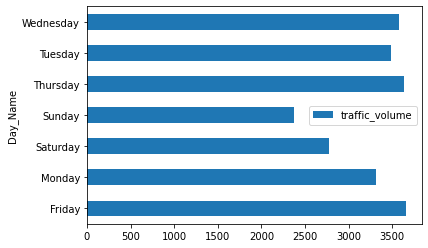

In [ ]:
traffic_df.groupby('Day_Name').aggregate({'traffic_volume':'mean'}).plot(kind='barh')



2.  Studying Day_Part vs Traffic Flow 

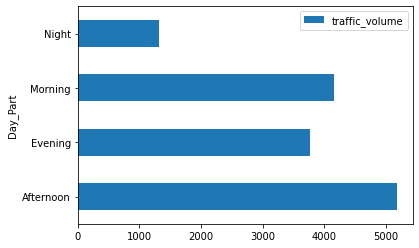

In [ ]:
traffic_df.groupby('Day_Part').aggregate({'traffic_volume':'mean'}).plot(kind='barh')

 3. Studying Month vs Traffic Flow 

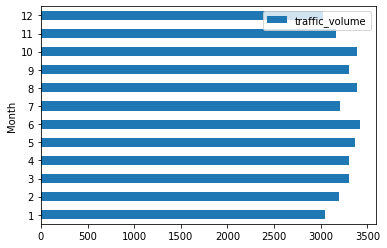

In [ ]:
traffic_df.groupby('Month').aggregate({'traffic_volume':'mean'}).plot(kind='barh')

 4. Studying Year vs Traffic Flow 

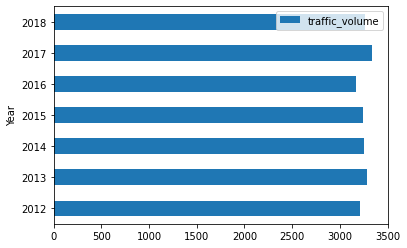

In [ ]:
traffic_df.groupby('Year').aggregate({'traffic_volume':'mean'}).plot(kind='barh')

5. weather_main vs traffic flow

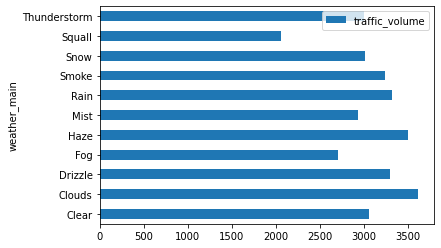

In [ ]:

traffic_df.groupby('weather_main').aggregate({'traffic_volume':'mean'}).plot(kind='barh')

6. rainfall vs traffic flow

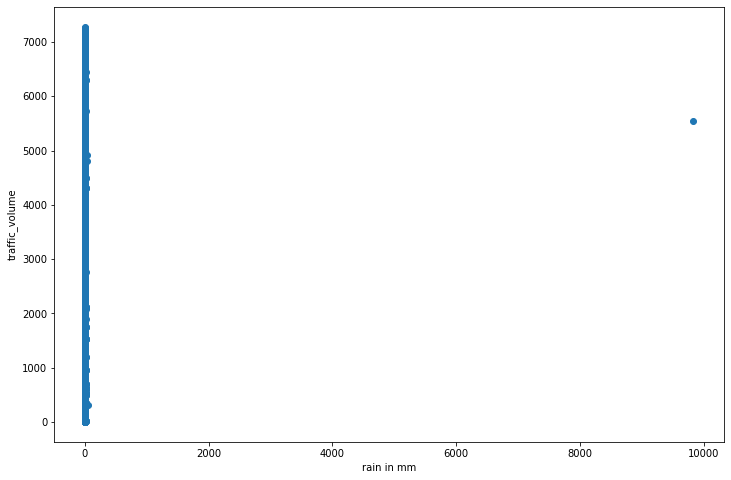

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(traffic_df['rain_1h'],traffic_df['traffic_volume'])
plt.xlabel('rain in mm')
plt.ylabel('traffic_volume')
plt.show()

###### seems like from the graph, the point where rainfall is less than 10000mm and greater than 8000mm seems to be an outlier. Let remove it and see how it behaves

In [ ]:
traffic_df= traffic_df[traffic_df['rain_1h']!=traffic_df['rain_1h'].max()]
traffic_df.describe()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Month,Year
count,48203.000000,48203.000000,48203.000000,48203.000000,48203.000000,48203.000000,48203.000000
mean,281.205437,0.130315,0.000222,49.361699,3259.771155,6.506027,2015.512416
std,13.338030,1.003378,0.008168,39.015980,1986.854254,3.400256,1.893230
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000,4.000000,2014.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000,7.000000,2016.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000,9.000000,2017.000000
max,310.070000,55.630000,0.510000,100.000000,7280.000000,12.000000,2018.000000


###### I had checked with other graph with modified traffic_df after removing outliers regarding the rainfall data. it seems to have no affect on other graphs, let's plot the rainfall data with respect to traffic flow once again and let's see the effect.

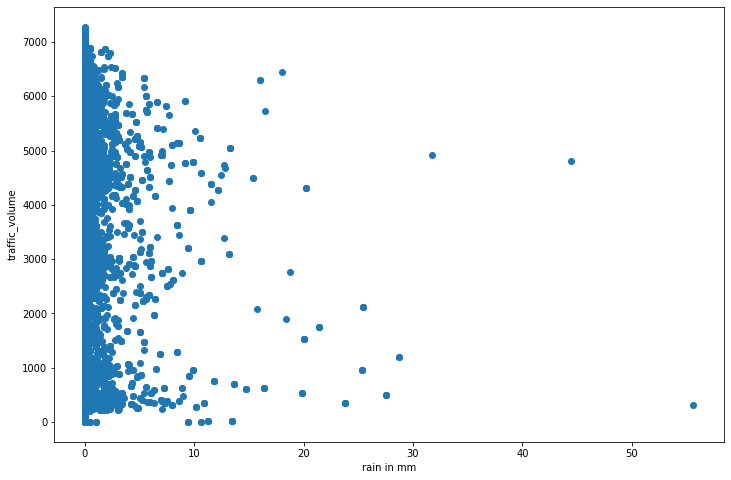

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(traffic_df['rain_1h'],traffic_df['traffic_volume'])
plt.xlabel('rain in mm')
plt.ylabel('traffic_volume')
plt.show()

7. snow_1h vs traffic_volume

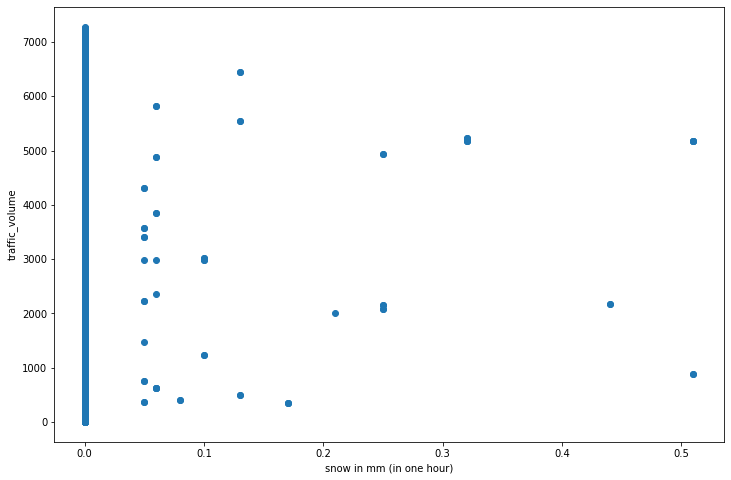

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(traffic_df['snow_1h'],traffic_df['traffic_volume'])
plt.xlabel('snow in mm (in one hour)')
plt.ylabel('traffic_volume')
plt.show()

8. temp vs traffic_volume

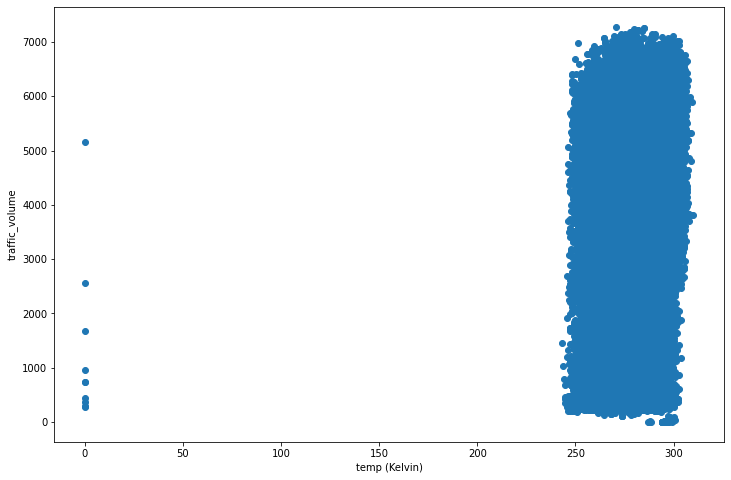

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(traffic_df['temp'],traffic_df['traffic_volume'])
plt.xlabel('temp (Kelvin)')
plt.ylabel('traffic_volume')
plt.show()

In [ ]:
traffic_df[traffic_df['temp']==traffic_df['temp'].min()]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,Month,Year,Day_Name,Day_Part
11898,None,0.0,0.0,0.0,0,Clear,361,1,2014,Friday,Night
11899,None,0.0,0.0,0.0,0,Clear,734,1,2014,Friday,Night
11900,None,0.0,0.0,0.0,0,Clear,2557,1,2014,Friday,Morning
11901,None,0.0,0.0,0.0,0,Clear,5150,1,2014,Friday,Morning
11946,None,0.0,0.0,0.0,0,Clear,291,2,2014,Sunday,Night
11947,None,0.0,0.0,0.0,0,Clear,284,2,2014,Sunday,Night
11948,None,0.0,0.0,0.0,0,Clear,434,2,2014,Sunday,Morning
11949,None,0.0,0.0,0.0,0,Clear,739,2,2014,Sunday,Morning
11950,None,0.0,0.0,0.0,0,Clear,962,2,2014,Sunday,Morning
11951,None,0.0,0.0,0.0,0,Clear,1670,2,2014,Sunday,Morning


##### looking at the plot above, i could see even at absolute zero kelvin (0 K or -273.16 0C ) there is a traffic. I think it seems to be a hypothetical data as absolute zero kelvin has never been attained :)


##### removing this data from the traffic_df and see the effect on other graphs

In [ ]:
traffic_df=traffic_df[traffic_df['temp']!=traffic_df['temp'].min()]


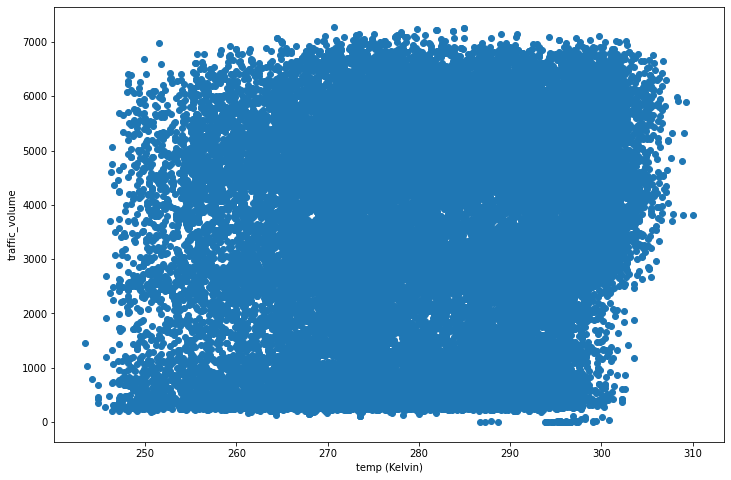

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(traffic_df['temp'],traffic_df['traffic_volume'])
plt.xlabel('temp (Kelvin)')
plt.ylabel('traffic_volume')
plt.show()

##### There seems to be no effect on removal of this value on other graphs.

9. holiday vs traffic volume

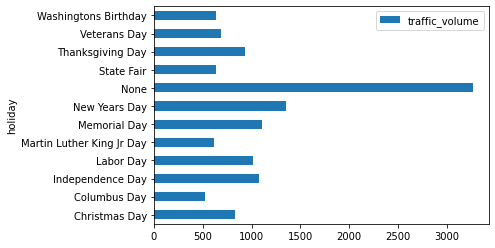

In [ ]:
traffic_df.groupby('holiday').aggregate({'traffic_volume':'mean'}).plot(kind='barh')

10. cloud_all with traffic_volume

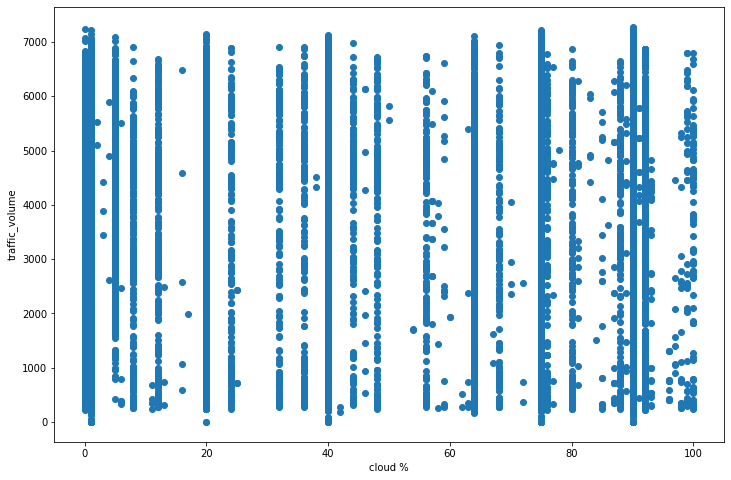

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(traffic_df['clouds_all'],traffic_df['traffic_volume'])
plt.xlabel('cloud %')
plt.ylabel('traffic_volume')
plt.show()

In [ ]:
traffic_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,Month,Year,Day_Name,Day_Part
0,None,288.28,0.0,0.0,40,Clouds,5545,10,2012,Tuesday,Morning
1,None,289.36,0.0,0.0,75,Clouds,4516,10,2012,Tuesday,Morning
2,None,289.58,0.0,0.0,90,Clouds,4767,10,2012,Tuesday,Morning
3,None,290.13,0.0,0.0,90,Clouds,5026,10,2012,Tuesday,Morning
4,None,291.14,0.0,0.0,75,Clouds,4918,10,2012,Tuesday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,3543,9,2018,Sunday,Evening
48200,None,282.76,0.0,0.0,90,Clouds,2781,9,2018,Sunday,Night
48201,None,282.73,0.0,0.0,90,Thunderstorm,2159,9,2018,Sunday,Night
48202,None,282.09,0.0,0.0,90,Clouds,1450,9,2018,Sunday,Night


Let's do one thing here, since in holiday column, we could see many holiday listed, so let;s seperate up generally as holiday or non-holiday

In [ ]:
traffic_df['holiday']= np.where(traffic_df['holiday']=='None','Not Holiday','Holiday')
traffic_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,Month,Year,Day_Name,Day_Part
0,Not Holiday,288.28,0.0,0.0,40,Clouds,5545,10,2012,Tuesday,Morning
1,Not Holiday,289.36,0.0,0.0,75,Clouds,4516,10,2012,Tuesday,Morning
2,Not Holiday,289.58,0.0,0.0,90,Clouds,4767,10,2012,Tuesday,Morning
3,Not Holiday,290.13,0.0,0.0,90,Clouds,5026,10,2012,Tuesday,Morning
4,Not Holiday,291.14,0.0,0.0,75,Clouds,4918,10,2012,Tuesday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
48199,Not Holiday,283.45,0.0,0.0,75,Clouds,3543,9,2018,Sunday,Evening
48200,Not Holiday,282.76,0.0,0.0,90,Clouds,2781,9,2018,Sunday,Night
48201,Not Holiday,282.73,0.0,0.0,90,Thunderstorm,2159,9,2018,Sunday,Night
48202,Not Holiday,282.09,0.0,0.0,90,Clouds,1450,9,2018,Sunday,Night


#### Plotting the holiday vs traffic volume again to see the results :)

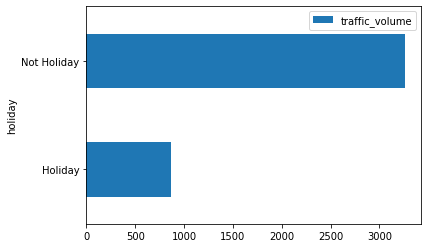

In [ ]:
traffic_df.groupby('holiday').aggregate({'traffic_volume':'mean'}).plot(kind='barh')

11. Studying with respect to Not holiday days 

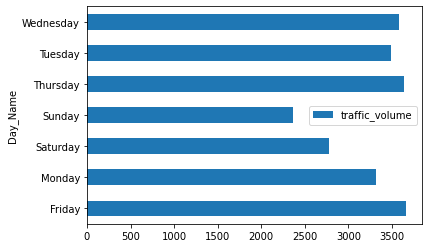

In [ ]:
traffic_df_noholiday= traffic_df[traffic_df['holiday']=='Not Holiday']
traffic_df_noholiday.groupby('Day_Name').aggregate({'traffic_volume':'mean'}).plot(kind='barh')

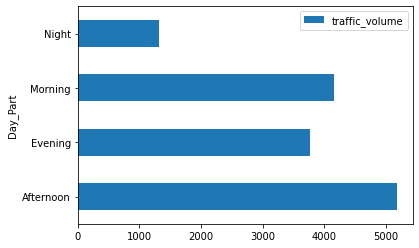

In [ ]:
traffic_df_noholiday.groupby('Day_Part').aggregate({'traffic_volume':'mean'}).plot(kind='barh')

12. Studying with respect to holiday days 

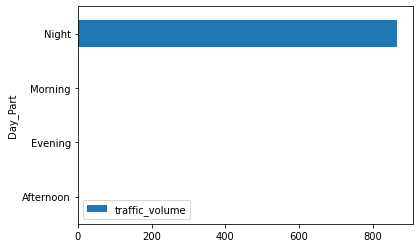

In [ ]:
traffic_df_holiday= traffic_df[traffic_df['holiday']=='Holiday']
traffic_df_holiday.groupby('Day_Part').aggregate({'traffic_volume':'mean'}).plot(kind='barh')

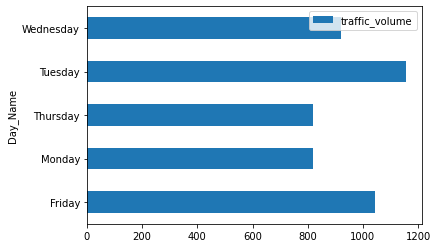

In [ ]:
traffic_df_holiday.groupby('Day_Name').aggregate({'traffic_volume':'mean'}).plot(kind='barh')

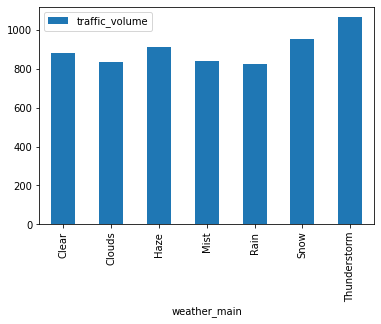

In [ ]:
traffic_df_holiday.groupby('weather_main').aggregate({'traffic_volume':'mean'}).plot(kind='bar')

In [ ]:
traffic_df_study= traffic_df.copy()
traffic_df_study

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,Month,Year,Day_Name,Day_Part
0,Not Holiday,288.28,0.0,0.0,40,Clouds,5545,10,2012,Tuesday,Morning
1,Not Holiday,289.36,0.0,0.0,75,Clouds,4516,10,2012,Tuesday,Morning
2,Not Holiday,289.58,0.0,0.0,90,Clouds,4767,10,2012,Tuesday,Morning
3,Not Holiday,290.13,0.0,0.0,90,Clouds,5026,10,2012,Tuesday,Morning
4,Not Holiday,291.14,0.0,0.0,75,Clouds,4918,10,2012,Tuesday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
48199,Not Holiday,283.45,0.0,0.0,75,Clouds,3543,9,2018,Sunday,Evening
48200,Not Holiday,282.76,0.0,0.0,90,Clouds,2781,9,2018,Sunday,Night
48201,Not Holiday,282.73,0.0,0.0,90,Thunderstorm,2159,9,2018,Sunday,Night
48202,Not Holiday,282.09,0.0,0.0,90,Clouds,1450,9,2018,Sunday,Night


In [ ]:
from sklearn.preprocessing import StandardScaler
X= traffic_df_study.drop('traffic_volume',axis=1)
y= traffic_df_study['traffic_volume']
X['holiday']= np.where(X['holiday']=='Holiday',1,0)
months= pd.get_dummies(X['Month'],drop_first=True)
weather_mains= pd.get_dummies(X['weather_main'],drop_first=True)
day_names= pd.get_dummies(X['Day_Name'],drop_first=True)
day_parts=pd.get_dummies(X['Day_Part'],drop_first=True)
X= pd.concat([X,months,weather_mains,day_names,day_parts],axis=1)
X.drop(['weather_main','Month','Day_Name','Day_Part'],axis=1,inplace=True)
X

,holiday,temp,rain_1h,snow_1h,clouds_all,Year,2,3,4,5,...,Thunderstorm,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Evening,Morning,Night
0,0,288.28,0.0,0.0,40,2012,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,289.36,0.0,0.0,75,2012,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,289.58,0.0,0.0,90,2012,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,290.13,0.0,0.0,90,2012,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,291.14,0.0,0.0,75,2012,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,2018,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
48200,0,282.76,0.0,0.0,90,2018,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
48201,0,282.73,0.0,0.0,90,2018,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
48202,0,282.09,0.0,0.0,90,2018,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)
sc=StandardScaler()
X_train[['temp','rain_1h','snow_1h','clouds_all','Year']]= sc.fit_transform(X_train[['temp','rain_1h','snow_1h','clouds_all','Year']])
X_test[['temp','rain_1h','snow_1h','clouds_all','Year']]= sc.transform(X_test[['temp','rain_1h','snow_1h','clouds_all','Year']])
X_train


,holiday,temp,rain_1h,snow_1h,clouds_all,Year,2,3,4,5,...,Thunderstorm,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Evening,Morning,Night
12012,0,-1.930546,-0.128612,-0.026339,1.043223,-0.803133,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
47427,0,0.974482,1.290168,-0.026339,1.043223,1.312363,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
44877,0,0.893084,-0.128612,-0.026339,1.043223,1.312363,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
14985,0,0.399957,0.644378,-0.026339,1.043223,-0.803133,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
54,0,0.991078,-0.128612,-0.026339,-0.238582,-1.860880,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21253,0,-2.225317,-0.128612,-0.026339,-1.238389,0.254615,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
45902,0,1.596424,-0.128612,-0.026339,-0.238582,1.312363,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
42624,0,-0.344477,-0.128612,-0.026339,1.043223,1.312363,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
43578,0,0.280626,-0.128612,-0.026339,-1.238389,1.312363,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
import statsmodels.api as sm
X_train_1= sm.add_constant(X_train)
model= sm.OLS(y_train,X_train_1).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:         traffic_volume   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2088.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        05:33:15   Log-Likelihood:            -2.8434e+05
No. Observations:               33735   AIC:                         5.688e+05
Df Residuals:                   33698   BIC:                         5.691e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5723.9794     35.112    163.022   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features= PolynomialFeatures(degree=3)
X_train_2= poly_features.fit_transform(X_train)
X_test_2= poly_features.transform(X_test)
poly_reg= LinearRegression()
poly_reg.fit(X_train_2,y_train)
print(f'The score of model on training data is {poly_reg.score(X_train_2,y_train)}')
print(f'The score of model on test data is {poly_reg.score(X_test_2,y_test)}')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


The score of model on training data is 0.792817798398698
The score of model on test data is -209537601717.46173


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor()
knn_model.fit(X_train,y_train)
y_pred= knn_model.predict(X_test)
print(f'The score of model on training data is {knn_model.score(X_train,y_train)}')
print(f'The score of model on test data is {knn_model.score(X_test,y_test)}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


The score of model on training data is 0.8144943000971748


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


The score of model on test data is 0.7059781427197986


In [ ]:
import warnings
warnings.filterwarnings("ignore")

##### seems like the result is good, but need to remove the overfitting by tuning with hyperparameters :)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'n_neighbors':[i for i in range(5,1400,100)],'weights':['uniform','distance'],'metric':['euclidean','minkowski'],'p':[1,2]}
estimator_model= KNeighborsRegressor()
grid_model= GridSearchCV(estimator=estimator_model,param_grid=parameters,scoring='r2',cv=5,error_score=0,return_train_score=True,verbose=10)
grid_model.fit(X_train,y_train)


Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV 1/5; 1/112] START metric=euclidean, n_neighbors=5, p=1, weights=uniform.....
[CV 1/5; 1/112] END metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=(train=0.803, test=0.703) total time=   3.9s
[CV 2/5; 1/112] START metric=euclidean, n_neighbors=5, p=1, weights=uniform.....
[CV 2/5; 1/112] END metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=(train=0.805, test=0.692) total time=   3.6s
[CV 3/5; 1/112] START metric=euclidean, n_neighbors=5, p=1, weights=uniform.....
[CV 3/5; 1/112] END metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=(train=0.805, test=0.690) total time=   3.6s
[CV 4/5; 1/112] START metric=euclidean, n_neighbors=5, p=1, weights=uniform.....
[CV 4/5; 1/112] END metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=(train=0.805, test=0.690) total time=   3.7s
[CV 5/5; 1/112] START metric=euclidean, n_neighbors=5, p=1, weights=uniform.....
[CV 5/5; 1/112] END metr

GridSearchCV(cv=5, error_score=0, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [5, 105, 205, 305, 405, 505, 605, 705,
                                         805, 905, 1005, 1105, 1205, 1305],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='r2', verbose=10)

In [ ]:
grid_model.best_params_

{'metric': 'minkowski', 'n_neighbors': 105, 'p': 1, 'weights': 'distance'}

In [ ]:
grid_model.best_score_

0.7221737170808084

In [ ]:
knn_model= KNeighborsRegressor(**grid_model.best_params_)
knn_model.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=105, p=1, weights='distance')

In [ ]:
print(f'The score of model on training data is {knn_model.score(X_train,y_train)}')
print(f'The score of model on test data is {knn_model.score(X_test,y_test)}')

The score of model on training data is 0.9965607429775566
The score of model on test data is 0.7352222159596169


#### Decision Tree Classifier

In [ ]:
traffic_df_study_2= traffic_df.copy()
X= traffic_df_study_2.drop('traffic_volume',axis=1)
y= traffic_df_study_2['traffic_volume']


In [ ]:
X['holiday']= np.where(X['holiday']=='Holiday',1,0)
X

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Month,Year,Day_Name,Day_Part
0,0,288.28,0.0,0.0,40,Clouds,10,2012,Tuesday,Morning
1,0,289.36,0.0,0.0,75,Clouds,10,2012,Tuesday,Morning
2,0,289.58,0.0,0.0,90,Clouds,10,2012,Tuesday,Morning
3,0,290.13,0.0,0.0,90,Clouds,10,2012,Tuesday,Morning
4,0,291.14,0.0,0.0,75,Clouds,10,2012,Tuesday,Afternoon
...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,Clouds,9,2018,Sunday,Evening
48200,0,282.76,0.0,0.0,90,Clouds,9,2018,Sunday,Night
48201,0,282.73,0.0,0.0,90,Thunderstorm,9,2018,Sunday,Night
48202,0,282.09,0.0,0.0,90,Clouds,9,2018,Sunday,Night


In [ ]:
from sklearn.preprocessing import LabelEncoder
le1= LabelEncoder()
le2= LabelEncoder()
le3= LabelEncoder()
X['weather_main']= le1.fit_transform(X['weather_main'])
X['Day_Name']= le2.fit_transform(X['Day_Name'])
X['Day_Part']= le3.fit_transform(X['Day_Part'])

X

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Month,Year,Day_Name,Day_Part
0,0,288.28,0.0,0.0,40,1,10,2012,5,2
1,0,289.36,0.0,0.0,75,1,10,2012,5,2
2,0,289.58,0.0,0.0,90,1,10,2012,5,2
3,0,290.13,0.0,0.0,90,1,10,2012,5,2
4,0,291.14,0.0,0.0,75,1,10,2012,5,0
...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,1,9,2018,3,1
48200,0,282.76,0.0,0.0,90,1,9,2018,3,3
48201,0,282.73,0.0,0.0,90,10,9,2018,3,3
48202,0,282.09,0.0,0.0,90,1,9,2018,3,3


In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)
X_train

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Month,Year,Day_Name,Day_Part
12012,0,256.88,0.00,0.0,90,1,2,2014,5,3
47427,0,293.64,1.45,0.0,90,5,9,2018,5,3
44877,0,292.61,0.00,0.0,90,10,6,2018,1,2
14985,0,286.37,0.79,0.0,90,6,6,2014,2,0
54,0,293.85,0.00,0.0,40,1,10,2012,4,1
...,...,...,...,...,...,...,...,...,...,...
21253,0,253.15,0.00,0.0,1,0,2,2016,2,3
45902,0,301.51,0.00,0.0,40,1,7,2018,1,0
42624,0,276.95,0.00,0.0,90,1,3,2018,1,3
43578,0,284.86,0.00,0.0,1,0,4,2018,6,0


#### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor(random_state=10,max_depth=8)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=10)

In [ ]:
print(f'The score of model on training data is {dt_model.score(X_train,y_train)}')
print(f'The score of model on test data is {dt_model.score(X_test,y_test)}')

The score of model on training data is 0.7631219517567884
The score of model on test data is 0.7531709254979206


#### Doing the pruning of decision tree regressor 

In [ ]:
path= dt_model.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha,impurities= path.ccp_alphas,path.impurities
ccp_alpha

array([0.00000000e+00, 1.33392619e-04, 4.62285460e-01, 5.71118028e-01,
       1.41516229e+00, 2.18550467e+00, 3.00532187e+00, 4.20193419e+00,
       5.16803659e+00, 6.26838793e+00, 1.53292663e+01, 1.58060531e+01,
       1.81736772e+01, 1.82763690e+01, 2.07036545e+01, 2.16389432e+01,
       2.26429959e+01, 2.37175782e+01, 2.38471079e+01, 2.45620317e+01,
       2.46563973e+01, 2.86626743e+01, 3.21433709e+01, 3.34790595e+01,
       3.38874611e+01, 3.42254026e+01, 3.52866367e+01, 3.64638359e+01,
       3.81221200e+01, 3.88964058e+01, 3.95382108e+01, 4.11071587e+01,
       4.20359872e+01, 4.22836866e+01, 4.26163184e+01, 4.48818385e+01,
       4.92880958e+01, 5.26945096e+01, 5.32017127e+01, 5.40467574e+01,
       5.56724465e+01, 5.58347198e+01, 5.60027705e+01, 5.61405665e+01,
       6.01261585e+01, 6.22228737e+01, 6.60670554e+01, 6.64671440e+01,
       6.80686757e+01, 7.00321614e+01, 7.23076443e+01, 7.82123061e+01,
       7.84604723e+01, 8.34542654e+01, 8.67818350e+01, 8.70112351e+01,
      

In [ ]:
len(ccp_alpha)

211

In [ ]:
dt_train_score=[]
dt_test_score=[]
for i in ccp_alpha:
  dt_model= DecisionTreeRegressor(random_state=10,ccp_alpha=i)
  dt_model.fit(X_train,y_train)
  dt_train_score.append(dt_model.score(X_train,y_train))
  dt_test_score.append(dt_model.score(X_test,y_test))

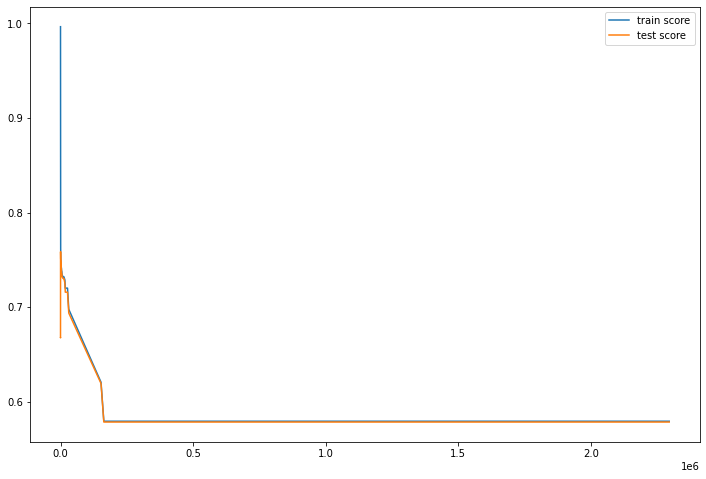

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(ccp_alpha,dt_train_score,label='train score')
plt.plot(ccp_alpha,dt_test_score,label='test score')
plt.legend()
plt.show()

In [ ]:
#### we could see decreasing max_depth had reduced the overfitting cases around.

Tuning the hyperparameters for decision tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth': range(5,20,2),
    'min_samples_leaf': range(50,300, 50),
    'min_samples_split': range(50,150, 50)}
base_estimator=DecisionTreeRegressor(random_state=10)
grid_model= GridSearchCV(estimator=base_estimator,param_grid=param_grid,cv=5,scoring='r2',verbose=10,return_train_score=True,error_score=0)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5; 1/80] START max_depth=5, min_samples_leaf=50, min_samples_split=50.....
[CV 1/5; 1/80] END max_depth=5, min_samples_leaf=50, min_samples_split=50;, score=(train=0.741, test=0.738) total time=   0.0s
[CV 2/5; 1/80] START max_depth=5, min_samples_leaf=50, min_samples_split=50.....
[CV 2/5; 1/80] END max_depth=5, min_samples_leaf=50, min_samples_split=50;, score=(train=0.744, test=0.730) total time=   0.0s
[CV 3/5; 1/80] START max_depth=5, min_samples_leaf=50, min_samples_split=50.....
[CV 3/5; 1/80] END max_depth=5, min_samples_leaf=50, min_samples_split=50;, score=(train=0.741, test=0.740) total time=   0.0s
[CV 4/5; 1/80] START max_depth=5, min_samples_leaf=50, min_samples_split=50.....
[CV 4/5; 1/80] END max_depth=5, min_samples_leaf=50, min_samples_split=50;, score=(train=0.740, test=0.747) total time=   0.1s
[CV 5/5; 1/80] START max_depth=5, min_samples_leaf=50, min_samples_split=50.....
[CV 5/5; 1/80] END max_de

GridSearchCV(cv=5, error_score=0,
             estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'max_depth': range(5, 20, 2),
                         'min_samples_leaf': range(50, 300, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, scoring='r2', verbose=10)

In [ ]:
grid_model.best_params_

{'max_depth': 11, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [ ]:
grid_model.best_score_

0.7537150894508078

In [ ]:
dt_tuned_model= DecisionTreeRegressor(**grid_model.best_params_)
dt_tuned_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=50, min_samples_split=50)

In [ ]:
print(f'The score of model on training data is {dt_tuned_model.score(X_train,y_train)}')
print(f'The score of model on test data is {dt_tuned_model.score(X_test,y_test)}')

The score of model on training data is 0.7703921655306105
The score of model on test data is 0.7512770657955401


In [ ]:
#### model seems to have less/no change after the hyperparameter tuning :)

#### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor_model= RandomForestRegressor(random_state=0)
rf_regressor_model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [ ]:
print(f'The score of model on training data is {rf_regressor_model.score(X_train,y_train)}')
print(f'The score of model on test data is {rf_regressor_model.score(X_test,y_test)}')

The score of model on training data is 0.9702358890697586
The score of model on test data is 0.8038293121668458


In [ ]:
#### let's do the hyperparameter tuning and see the results

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid={'n_estimators':[i for i in range(100,1600,100)],'max_depth':[i for i in range(5,20,2)],'min_samples_leaf': range(50,300, 50),
    'min_samples_split': range(50,150, 50)}
grid_model= RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),param_distributions=param_grid,cv=5,verbose=10,error_score=0,return_train_score=True,n_iter=5)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START max_depth=11, min_samples_leaf=200, min_samples_split=50, n_estimators=1000
[CV 1/5; 1/5] END max_depth=11, min_samples_leaf=200, min_samples_split=50, n_estimators=1000;, score=(train=0.753, test=0.748) total time=  34.7s
[CV 2/5; 1/5] START max_depth=11, min_samples_leaf=200, min_samples_split=50, n_estimators=1000
[CV 2/5; 1/5] END max_depth=11, min_samples_leaf=200, min_samples_split=50, n_estimators=1000;, score=(train=0.755, test=0.740) total time=  35.1s
[CV 3/5; 1/5] START max_depth=11, min_samples_leaf=200, min_samples_split=50, n_estimators=1000
[CV 3/5; 1/5] END max_depth=11, min_samples_leaf=200, min_samples_split=50, n_estimators=1000;, score=(train=0.753, test=0.749) total time=  32.6s
[CV 4/5; 1/5] START max_depth=11, min_samples_leaf=200, min_samples_split=50, n_estimators=1000
[CV 4/5; 1/5] END max_depth=11, min_samples_leaf=200, min_samples_split=50, n_estimators=1000;, score=(train=0.751,

RandomizedSearchCV(cv=5, error_score=0,
                   estimator=RandomForestRegressor(random_state=0), n_iter=5,
                   param_distributions={'max_depth': [5, 7, 9, 11, 13, 15, 17,
                                                      19],
                                        'min_samples_leaf': range(50, 300, 50),
                                        'min_samples_split': range(50, 150, 50),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   return_train_score=True, verbose=10)

In [ ]:
rf_reg_model= RandomForestRegressor(**grid_model.best_params_)
rf_reg_model.fit(X_train,y_train)


RandomForestRegressor(max_depth=13, min_samples_leaf=50, min_samples_split=100,
                      n_estimators=900)

In [ ]:
print(f'The score of model on training data is {rf_reg_model.score(X_train,y_train)}')
print(f'The score of model on test data is {rf_reg_model.score(X_test,y_test)}')

The score of model on training data is 0.7775845533145048
The score of model on test data is 0.7635965346142785


In [ ]:
#### still there is not much increment in r2 scores for this model comparing with dt

#### Adaboost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_reg_model= AdaBoostRegressor(random_state=1)
adaboost_reg_model.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [ ]:
print(f'The score of model on trained data is {adaboost_reg_model.score(X_train,y_train)}')
print(f'The score of model on test data is {adaboost_reg_model.score(X_test,y_test)}')

The score of model on trained data is 0.6878648268584928
The score of model on test data is 0.6843863495986363


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid= {'base_estimator':[DecisionTreeRegressor(max_depth=i) for i in range(2,10)],'n_estimators':[i for i in range(50,500,50)],'learning_rate':[0.01,0.1,0.2,0.3,1],'loss':['linear', 'square', 'exponential']}
grid_model= RandomizedSearchCV(estimator=AdaBoostRegressor(random_state=1),param_distributions=param_grid,cv=5,verbose=10,return_train_score=True,error_score=0)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START base_estimator=DecisionTreeRegressor(max_depth=8), learning_rate=0.1, loss=square, n_estimators=350
[CV 1/5; 1/10] END base_estimator=DecisionTreeRegressor(max_depth=8), learning_rate=0.1, loss=square, n_estimators=350;, score=(train=0.750, test=0.734) total time=  16.4s
[CV 2/5; 1/10] START base_estimator=DecisionTreeRegressor(max_depth=8), learning_rate=0.1, loss=square, n_estimators=350
[CV 2/5; 1/10] END base_estimator=DecisionTreeRegressor(max_depth=8), learning_rate=0.1, loss=square, n_estimators=350;, score=(train=0.751, test=0.729) total time=  15.5s
[CV 3/5; 1/10] START base_estimator=DecisionTreeRegressor(max_depth=8), learning_rate=0.1, loss=square, n_estimators=350
[CV 3/5; 1/10] END base_estimator=DecisionTreeRegressor(max_depth=8), learning_rate=0.1, loss=square, n_estimators=350;, score=(train=0.749, test=0.734) total time=  15.9s
[CV 4/5; 1/10] START base_estimator=DecisionTreeRegressor(ma

RandomizedSearchCV(cv=5, error_score=0,
                   estimator=AdaBoostRegressor(random_state=1),
                   param_distributions={'base_estimator': [DecisionTreeRegressor(max_depth=2),
                                                           DecisionTreeRegressor(max_depth=3),
                                                           DecisionTreeRegressor(max_depth=4),
                                                           DecisionTreeRegressor(max_depth=5),
                                                           DecisionTreeRegressor(max_depth=6),
                                                           DecisionTreeRegressor(max_depth=7),
                                                           DecisionTreeRegressor(max_depth=8),
                                                           DecisionTreeRegressor(max_depth=9)],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                        

In [ ]:
grid_model.best_params_

{'base_estimator': DecisionTreeRegressor(max_depth=9),
 'learning_rate': 0.01,
 'loss': 'square',
 'n_estimators': 100}

In [ ]:
grid_model.best_score_

0.7626671657474171

In [ ]:
adaboost_reg_tuned= AdaBoostRegressor(**grid_model.best_params_,random_state=1)
adaboost_reg_tuned.fit(X_train,y_train)
print(f'The score of model on trained data is {adaboost_reg_tuned.score(X_train,y_train)}')
print(f'The score of model on test data is {adaboost_reg_tuned.score(X_test,y_test)}')

The score of model on trained data is 0.7780041987901647
The score of model on test data is 0.7640484303885255


### XGB Regressor

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
xgb_model= XGBRegressor()
xgb_model.fit(X_train,y_train)


[05:39:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgb_model.score(X_train,y_train)

0.7469330343079144

In [ ]:
xgb_model.score(X_test,y_test)

0.7444521966312819

In [58]:
from sklearn.model_selection import RandomizedSearchCV
params={'n_estimators':[i for i in range(100,1600,100)],'max_depth':[i for i in range(1,11)],'eta':[0.1,0.01,0.001,0.2,0.3,0.4,0.5,0.6,0.7]}
xgboost_random_model= RandomizedSearchCV(estimator=XGBRegressor(),param_distributions=params,n_iter=10,scoring='r2',verbose=20,return_train_score=True,error_score=0)
xgboost_random_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START eta=0.7, max_depth=1, n_estimators=500.....................
[06:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5; 1/10] END eta=0.7, max_depth=1, n_estimators=500;, score=(train=0.690, test=0.685) total time=   5.6s
[CV 2/5; 1/10] START eta=0.7, max_depth=1, n_estimators=500.....................
[06:03:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5; 1/10] END eta=0.7, max_depth=1, n_estimators=500;, score=(train=0.691, test=0.681) total time=   4.3s
[CV 3/5; 1/10] START eta=0.7, max_depth=1, n_estimators=500.....................
[06:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5; 1/10] END eta=0.7, max_depth=1, n_estimators=500;, score=(train=0.689, test=0.689) t

RandomizedSearchCV(error_score=0, estimator=XGBRegressor(),
                   param_distributions={'eta': [0.1, 0.01, 0.001, 0.2, 0.3, 0.4,
                                                0.5, 0.6, 0.7],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   return_train_score=True, scoring='r2', verbose=20)

In [59]:
xgboost_random_model.best_params_

{'eta': 0.01, 'max_depth': 9, 'n_estimators': 1000}

In [60]:
xgboost_random_model.best_score_

0.784839892008056

In [61]:
xgboost_reg_tuned= XGBRegressor(**xgboost_random_model.best_params_)
xgboost_reg_tuned.fit(X_train,y_train)

[06:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.01, max_depth=9, n_estimators=1000)

In [62]:
xgboost_reg_tuned.score(X_train,y_train)

0.9610901331992496

In [63]:
xgboost_reg_tuned.score(X_test,y_test)

0.8004264641131611